1. [Importing data & libraries](#section1)
2. [Statistical analysis of Above Ground Biomass preprocessed data](#section2)
3. [Statistical analysis of Weather Anomalies preprocessed data](#section3)
4. [Statistical analysis of Burned Area preprocessed data](#section4)
5. [Statistical analysis of Fraction of Burnable Area preprocessed data](#section5)
6. [Statistical analysis of slopes preprocessed data](#section11)
7. [Statistical analysis of climatic regions preprocessed data](#section12)
8. [Statistical analysis of fire anomalies preprocessed data](#section14)
9. [Statistical analysis of SPI preprocessed data](#section14)
10. [Statistical analysis of Leaf area preprocessed data](#section14)
11. [Statistical analysis of Fuel Load data](#section18)
12. [Plots of the data distribution](#section6)
    - 12.1 [Plotting AGB data](#section7)
    - 12.2 [Plotting Aeather Anomalies data](#section8)
    - 12.3 [Plotting Burned Area data](#section9)
    - 12.4 [Plotting Slopes data](#section10)
    - 12.5 [Plotting Climatic Regions data](#section13)
    - 12.6 [Plotting Fire Anomalies data](#section15)
    - 12.7 [Plotting SPI-GPCC data](#section16)
    - 12.9 [Plotting Leaf Area Index data](#section17)
    - 12.10 [Plotting Fuel Load data](#section18)

<a id='section1'></a>
## Importing data & libraries

In [1]:
agb_data_path = "../data/agb_avitabile_2010-2016_v3.nc"
weather_anomalies_data_path = "../data/weather_anomalies_2010-2016_v3.nc"
burned_area_data_path = "../data/ba_2010-2016_v3.nc"
ba_fraction_data_path = "../data/ba_fraction_2010-2016_v3.nc"
slopes_data_path = "../data/slopes_2010-2016_v3.nc"
climatic_regions_data_path = "../data/climatic_regions_v3.nc"
fire_anomalies_data_path = "../data/fire_anomalies_2010-2016_v3.nc"
spi_gpcc_data_path = "../data/spi-gpcc_2010-2016_corrected_v3.nc"
leaf_area_index_path = "../data/LAI_monthly_2010-2016_v2.nc"
fuel_load_data_path = "../data/fuel_load.nc"

In [2]:
import xarray as xr
import numpy
from numpy import mean, absolute
from random import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
import numpy as np

In [3]:
"""Load AGB data into an xarray dataset"""
agb_data = xr.open_dataset(agb_data_path)

In [4]:
print(agb_data)

<xarray.Dataset>
Dimensions:                (latitude: 720, longitude: 1440, time: 84)
Coordinates:
  * time                   (time) datetime64[ns] 2010-01-01 ... 2016-12-01
  * longitude              (longitude) float32 -179.9 -179.6 ... 179.6 179.9
  * latitude               (latitude) float32 -89.88 -89.62 ... 89.62 89.88
Data variables:
    abg_avitabile_vod5th   (time, latitude, longitude) float64 ...
    abg_avitabile_vodmean  (time, latitude, longitude) float64 ...
    abg_avitabile_vod95th  (time, latitude, longitude) float64 ...


In [5]:
"""Load Weather Anomalies data into an xarray dataset"""
weather_anomalies_data = xr.open_dataset(weather_anomalies_data_path)

In [6]:
print(weather_anomalies_data)

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, time: 84)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2016-12-01
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    d2m        (time, latitude, longitude) float32 ...
    erate      (time, latitude, longitude) float32 ...
    fg10       (time, latitude, longitude) float32 ...
    si10       (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    tprate     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-19 14:28:47 GMT by grib_to_netcdf-2.17.1: grib_to_n...


In [7]:
"""Load Burned Area data into an xarray dataset"""
burned_area_data = xr.open_dataset(burned_area_data_path)

In [8]:
print(burned_area_data)

<xarray.Dataset>
Dimensions:      (latitude: 720, longitude: 1440, time: 84)
Coordinates:
  * time         (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2016-12-01
  * latitude     (latitude) float32 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude    (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    burned_area  (time, latitude, longitude) float32 ...
Attributes: (12/40)
    title:                      Fire_cci Gridded MODIS Burned Area product
    institution:                University of Alcala
    source:                     MODIS MOD09GQ Collection 6, MODIS MOD09GA Col...
    history:                    Created on 2018-12-02 00:08:23
    references:                 See www.esa-fire-cci.org
    tracking_id:                d881ff6e-9892-45d7-9b9c-85e92cd4ddac
    ...                         ...
    sensor:                     MODIS
    spatial_resolution:         0.25 degrees
    geospatial_lon_units:       degrees_east
    geospatial_lat_u

In [9]:
"""Load Fraction of Burnable Area data into an xarray dataset"""
ba_fraction_data = xr.open_dataset(ba_fraction_data_path)

In [10]:
print(ba_fraction_data)

<xarray.Dataset>
Dimensions:                    (latitude: 720, longitude: 1440, time: 84)
Coordinates:
  * time                       (time) datetime64[ns] 2010-01-01 ... 2016-12-01
  * latitude                   (latitude) float32 89.88 89.62 ... -89.62 -89.88
  * longitude                  (longitude) float32 -179.9 -179.6 ... 179.6 179.9
Data variables:
    fraction_of_burnable_area  (time, latitude, longitude) float32 ...
Attributes: (12/40)
    title:                      Fire_cci Gridded MODIS Burned Area product
    institution:                University of Alcala
    source:                     MODIS MOD09GQ Collection 6, MODIS MOD09GA Col...
    history:                    Created on 2018-12-02 00:08:23
    references:                 See www.esa-fire-cci.org
    tracking_id:                d881ff6e-9892-45d7-9b9c-85e92cd4ddac
    ...                         ...
    sensor:                     MODIS
    spatial_resolution:         0.25 degrees
    geospatial_lon_units:       

In [11]:
"""Load Slope data into an xarray dataset"""
slopes_data = xr.open_dataset(slopes_data_path)

In [12]:
print(slopes_data)

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    slor       (latitude, longitude) float64 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-12-20T07:26:33 GRIB to CDM+CF via cfgrib-0....


In [13]:
"""Load Climatic Regions data into an xarray dataset"""
climatic_regions_data = xr.open_dataset(climatic_regions_data_path)

In [14]:
print(climatic_regions_data)

<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440)
Coordinates:
  * latitude         (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude        (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
Data variables:
    climatic_region  (latitude, longitude) float64 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-12-20T06:06:38 GRIB to CDM+CF via cfgrib-0....


In [15]:
"""Load Fire Anomalies data into an xarray dataset"""
fire_anomalies_data = xr.open_dataset(fire_anomalies_data_path)

In [16]:
print(fire_anomalies_data)

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, time: 84)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2016-12-01
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    fwinx      (time, latitude, longitude) float32 ...
    drtcode    (time, latitude, longitude) float32 ...
    fdsrte     (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-12-19T23:50:14 GRIB to CDM+CF via cfgrib-0....


In [17]:
"""Load SPI-GPCC data into an xarray dataset"""
spi_gpcc_data = xr.open_dataset(spi_gpcc_data_path)

In [18]:
print(spi_gpcc_data)

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, time: 84)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time       (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2016-12-01
Data variables:
    spi03      (time, latitude, longitude) float32 ...
    spi12      (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-03-24T08:59:39 GRIB to CDM+CF via cfgrib-0....


In [19]:
"""Load SPI-GPCC data into an xarray dataset"""
leaf_area_data = xr.open_dataset(leaf_area_index_path)

In [20]:
print(leaf_area_data)

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, time: 84)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2016-12-01
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    LAI        (time, latitude, longitude) float32 ...


In [21]:
"""Load Fuel load data into an xarray dataset"""
fuel_load_data = xr.open_dataset(fuel_load_data_path)

In [22]:
print(fuel_load_data)

<xarray.Dataset>
Dimensions:                        (latitude: 720, longitude: 1440, time: 84)
Coordinates:
  * latitude                       (latitude) float32 -89.88 -89.62 ... 89.88
  * time                           (time) datetime64[ns] 2010-01-01 ... 2016-...
  * longitude                      (longitude) float32 -179.9 -179.6 ... 179.9
Data variables:
    __xarray_dataarray_variable__  (time, latitude, longitude) float64 ...


<a id='section2'></a>
## Statistical analysis of Above Ground Biomass (AGB) preprocessed data

In [23]:
"""Mean values under each data variable in the AGB dataset"""
print(agb_data.mean())

<xarray.Dataset>
Dimensions:                ()
Data variables:
    abg_avitabile_vod5th   float64 22.16
    abg_avitabile_vodmean  float64 50.18
    abg_avitabile_vod95th  float64 97.22


In [24]:
"""Variance values under each data variable in the xarray dataset"""
print(agb_data.var())

<xarray.Dataset>
Dimensions:                ()
Data variables:
    abg_avitabile_vod5th   float64 3.32e+03
    abg_avitabile_vodmean  float64 8.127e+03
    abg_avitabile_vod95th  float64 1.967e+04


In [25]:
"""Minimum values under each data variable in the xarray dataset"""
print(agb_data.min())

<xarray.Dataset>
Dimensions:                ()
Data variables:
    abg_avitabile_vod5th   float64 0.0
    abg_avitabile_vodmean  float64 0.0
    abg_avitabile_vod95th  float64 0.0


In [26]:
"""Maximum values under each data variable in the xarray dataset4"""
print(agb_data.max())

<xarray.Dataset>
Dimensions:                ()
Data variables:
    abg_avitabile_vod5th   float64 278.8
    abg_avitabile_vodmean  float64 387.3
    abg_avitabile_vod95th  float64 480.3


In [27]:
"""Converting agb xarray to dataframe"""
agb_data_dataframe = agb_data.to_dataframe()

"""Getting statistical results from the dataframe"""
print(agb_data_dataframe.describe())

       abg_avitabile_vod5th  abg_avitabile_vodmean  abg_avitabile_vod95th
count          1.162370e+07           1.162370e+07           1.162370e+07
mean           2.216107e+01           5.017954e+01           9.721972e+01
std            5.761816e+01           9.014966e+01           1.402591e+02
min            0.000000e+00           0.000000e+00           0.000000e+00
25%            0.000000e+00           1.299340e+00           4.685758e+00
50%            2.133812e+00           1.127245e+01           2.447309e+01
75%            1.186341e+01           4.736213e+01           1.282035e+02
max            2.787640e+02           3.873029e+02           4.803394e+02


In [28]:
"""Total number of null values in agb data"""
print(agb_data_dataframe.isna().sum())

abg_avitabile_vod5th     75467504
abg_avitabile_vodmean    75467504
abg_avitabile_vod95th    75467504
dtype: int64


In [29]:
"""Mean absolute deviation of the AGB data under each data variable"""
print(agb_data_dataframe.mad())

abg_avitabile_vod5th      31.053582
abg_avitabile_vodmean     59.969639
abg_avitabile_vod95th    110.036419
dtype: float64


In [30]:
agb_data_dataframe.head(3)

abg_avitabile_vod5th  abg_avitabile_vodmean  \
latitude longitude time                                                      
-89.875  -179.875  2010-01-01                   NaN                    NaN   
                   2010-02-01                   NaN                    NaN   
                   2010-03-01                   NaN                    NaN   

                               abg_avitabile_vod95th  
latitude longitude time                               
-89.875  -179.875  2010-01-01                    NaN  
                   2010-02-01                    NaN  
                   2010-03-01                    NaN

In [31]:
agb_data_dataframe.reset_index().head(3)

,latitude,longitude,time,abg_avitabile_vod5th,abg_avitabile_vodmean,abg_avitabile_vod95th
0,-89.875,-179.875,2010-01-01,NaN,NaN,NaN
1,-89.875,-179.875,2010-02-01,NaN,NaN,NaN
2,-89.875,-179.875,2010-03-01,NaN,NaN,NaN


<a id='section3'></a>
## Statistical analysis of Weather Anomalies preprocessed data

In [32]:
"""Mean values under each data variable in the Weather Anomalies dataset"""
print(weather_anomalies_data.mean())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    d2m      float32 -0.1883
    erate    float32 0.1876
    fg10     float32 -15.65
    si10     float32 -9.93
    swvl1    float32 0.0003241
    t2m      float32 -0.1958
    tprate   float32 -0.3471


In [33]:
"""Variance values under each data variable in the Weather Anomalies xarray"""
print(weather_anomalies_data.var())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    d2m      float32 1.532
    erate    float32 110.8
    fg10     float32 6.303e+05
    si10     float32 2.266e+05
    swvl1    float32 0.0001527
    t2m      float32 1.296
    tprate   float32 794.3


In [34]:
"""Minimum values under each data variable in the Weather Anomalies xarray"""
print(weather_anomalies_data.min())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    d2m      float32 -13.15
    erate    float32 -164.2
    fg10     float32 -7.151e+03
    si10     float32 -3.925e+03
    swvl1    float32 -0.2691
    t2m      float32 -12.62
    tprate   float32 -665.4


In [35]:
"""Maximum values under each data variable in the Weather Anomalies xarray"""
print(weather_anomalies_data.max())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    d2m      float32 9.839
    erate    float32 193.5
    fg10     float32 5.9e+03
    si10     float32 4.332e+03
    swvl1    float32 0.2853
    t2m      float32 10.14
    tprate   float32 599.5


In [36]:
"""Converting Weather Anomalies xarray to dataframe"""
weather_anomalies_dataframe = weather_anomalies_data.to_dataframe()

"""Getting statistical results from the dataframe"""
print(weather_anomalies_dataframe.describe())

                d2m         erate          fg10          si10         swvl1  \
count  8.697024e+07  8.697024e+07  8.697024e+07  8.697024e+07  8.697024e+07   
mean  -1.882560e-01  1.876207e-01 -1.564758e+01 -9.930058e+00  3.241260e-04   
std    1.237578e+00  1.052696e+01  7.938864e+02  4.759939e+02  1.235854e-02   
min   -1.314905e+01 -1.641837e+02 -7.151116e+03 -3.925143e+03 -2.690543e-01   
25%   -6.965829e-01 -3.381611e+00 -4.405978e+02 -2.463430e+02 -2.011657e-06   
50%   -1.463832e-01 -2.043218e-02  4.009737e+00  2.180600e+00 -2.533197e-07   
75%    3.701758e-01  3.419234e+00  4.308952e+02  2.382083e+02  2.086163e-06   
max    9.838866e+00  1.935255e+02  5.899908e+03  4.331689e+03  2.852716e-01   

                t2m        tprate  
count  8.697024e+07  8.697024e+07  
mean  -1.958153e-01 -3.470980e-01  
std    1.138393e+00  2.818334e+01  
min   -1.262090e+01 -6.653900e+02  
25%   -6.324874e-01 -5.868562e+00  
50%   -1.400390e-01  4.109106e-01  
75%    2.949520e-01  6.968479e+00  


In [37]:
"""Total number of null values in the data"""
print(weather_anomalies_dataframe.isna().sum())

d2m       120960
erate     120960
fg10      120960
si10      120960
swvl1     120960
t2m       120960
tprate    120960
dtype: int64


In [38]:
"""Mean absolute deviation of the data under each data variable"""
print(weather_anomalies_dataframe.mad())

d2m         0.828383
erate       6.484006
fg10      584.687500
si10      341.366119
swvl1       0.004233
t2m         0.747000
tprate     14.587057
dtype: float32


In [39]:
weather_anomalies_dataframe.head(3)

d2m  erate  fg10  si10  swvl1  t2m  tprate
latitude longitude time                                                  
-89.875  -179.875  2010-01-01  NaN    NaN   NaN   NaN    NaN  NaN     NaN
                   2010-02-01  NaN    NaN   NaN   NaN    NaN  NaN     NaN
                   2010-03-01  NaN    NaN   NaN   NaN    NaN  NaN     NaN

In [40]:
weather_anomalies_dataframe.reset_index().head(3)

,latitude,longitude,time,d2m,erate,fg10,si10,swvl1,t2m,tprate
0,-89.875,-179.875,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-89.875,-179.875,2010-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-89.875,-179.875,2010-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='section4'></a>
## Statistical analysis of burned area preprocessed data

In [41]:
"""Mean values of the Burned Area data"""
print(burned_area_data.mean())

<xarray.Dataset>
Dimensions:      ()
Data variables:
    burned_area  float32 3.637e+05


In [42]:
"""Variance of the Burned Area data"""
print(burned_area_data.var())

<xarray.Dataset>
Dimensions:      ()
Data variables:
    burned_area  float32 5.893e+13


In [43]:
"""Minimum of the Burned Area data"""
print(burned_area_data.min())

<xarray.Dataset>
Dimensions:      ()
Data variables:
    burned_area  float32 0.0


In [44]:
"""Maximum of the Burned Area data"""
print(burned_area_data.max())

<xarray.Dataset>
Dimensions:      ()
Data variables:
    burned_area  float32 7.62e+08


In [45]:
"mean absolute deviation for each data variable, in this case we have only 1 data variable, ie burned_area"
var_list = ['burned_area']

def mad(data, axis=None):
    return mean(absolute(data - mean(data, axis)), axis)

for i in range(len(var_list)):
    print(var_list[i] +  ": "  + str(mad(burned_area_data).burned_area.values))

burned_area: 718553.56


<a id='section5'></a>
## Statistical analysis of 'Fraction of Burnable Area' preprocessed data

In [46]:
"""Mean values under each data variable in the xarray, in this case we have only 1 data variable, ie fraction_of_burnable_area"""
print(ba_fraction_data.mean())

<xarray.Dataset>
Dimensions:                    ()
Data variables:
    fraction_of_burnable_area  float32 0.1892


In [47]:
"""Variance values under each data variable in the xarray, in this case we have only 1 data variable, ie fraction_of_burnable_area"""
print(ba_fraction_data.var())

<xarray.Dataset>
Dimensions:                    ()
Data variables:
    fraction_of_burnable_area  float32 0.1404


In [48]:
"""Minimum values under each data variable in the xarray, in this case we have only 1 data variable, ie fraction_of_burnable_area"""
print(ba_fraction_data.min())

<xarray.Dataset>
Dimensions:                    ()
Data variables:
    fraction_of_burnable_area  float32 0.0


In [49]:
"""Maximum values under each data variable in the xarray, in this case we have only 1 data variable, ie fraction_of_burnable_area"""
print(ba_fraction_data.max())

<xarray.Dataset>
Dimensions:                    ()
Data variables:
    fraction_of_burnable_area  float32 1.0


In [50]:
"mean absolute deviation for each data variable, in this case we have only 1 data variable, ie fraction_of_burnable_area"
var_list = ['fraction_of_burnable_area']

for i in range(len(var_list)):
    print(var_list[i] +  ": "  + str(mad(ba_fraction_data).fraction_of_burnable_area.values))

fraction_of_burnable_area: 0.29684192


<a id='section11'></a>
## Statistical analysis of 'Slope' preprocessed data

In [51]:
"""Mean values under each data variable in the xarray, in this case we have only 1 data variable, ie slor"""
print(slopes_data.mean())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    slor     float64 0.003458


In [52]:
"""Variance values under each data variable in the xarray, in this case we have only 1 data variable, ie slor"""
print(slopes_data.var())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    slor     float64 9.15e-05


In [53]:
"""Minimum values under each data variable in the xarray, in this case we have only 1 data variable, ie slor"""
print(slopes_data.min())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    slor     float64 0.0001


In [54]:
"""Maximum values under each data variable in the xarray, in this case we have only 1 data variable, ie slor"""
print(slopes_data.max())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    slor     float64 0.1381


In [55]:
"""Converting Slope xarray to dataframe"""
slopes_data_dataframe = slopes_data.to_dataframe()

In [56]:
"""Getting statistical results from the Slope dataframe"""
print(slopes_data_dataframe.describe())

               slor
count  1.036080e+06
mean   3.458163e-03
std    9.565404e-03
min    9.999999e-05
25%    9.999999e-05
50%    9.999999e-05
75%    1.520891e-03
max    1.380987e-01


In [57]:
"""Total number of null values in Slope data"""
print(slopes_data_dataframe.isna().sum())

slor    720
dtype: int64


In [58]:
"""Mean absolute deviation of the data under each data variable"""
print(slopes_data_dataframe.mad())

slor    0.005064
dtype: float64


In [59]:
slopes_data_dataframe.head(3)

slor
latitude longitude          
-89.875  -179.875   0.001379
         -179.625   0.001378
         -179.375   0.001378

In [60]:
slopes_data_dataframe.reset_index().head(3)

,latitude,longitude,slor
0,-89.875,-179.875,0.001379
1,-89.875,-179.625,0.001378
2,-89.875,-179.375,0.001378


<a id='section12'></a>
## Statistical analysis of 'Climatic Regions' preprocessed data

In [61]:
"""Mean values under each data variable in the CR xarray"""
print(climatic_regions_data.mean())

<xarray.Dataset>
Dimensions:          ()
Data variables:
    climatic_region  float64 3.193


In [62]:
"""Variance values under each data variable in the CR xarray"""
print(climatic_regions_data.var())

<xarray.Dataset>
Dimensions:          ()
Data variables:
    climatic_region  float64 2.54


In [63]:
"""Minimum values under each data variable in the CR xarray"""
print(climatic_regions_data.min())

<xarray.Dataset>
Dimensions:          ()
Data variables:
    climatic_region  float64 1.0


In [64]:
"""Maximum values under each data variable in the CR xarray"""
print(climatic_regions_data.max())

<xarray.Dataset>
Dimensions:          ()
Data variables:
    climatic_region  float64 5.0


In [65]:
"""Converting CR xarray to dataframe"""
climatic_regions_data_dataframe = climatic_regions_data.to_dataframe()

In [66]:
"""Getting statistical results from the CR dataframe"""
print(climatic_regions_data_dataframe.describe())

       climatic_region
count    326013.000000
mean          3.192652
std           1.593625
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           5.000000


In [67]:
"""Total number of null values in agb data"""
print(climatic_regions_data_dataframe.isna().sum())

climatic_region    710787
dtype: int64


In [68]:
"""Mean absolute deviation of the data under each data variable"""
print(climatic_regions_data_dataframe.mad())

climatic_region    1.476183
dtype: float64


<a id='section14'></a>
## Statistical analysis of fire anomalies data
#### FWINX = Fire Weather Index
#### DRTCODE = Drought Code
#### FDSRTE = Fire Danger Severity Rating

In [69]:
"""Mean values under each data variable in the xarray"""
print("fwinx " + str(fire_anomalies_data.mean().fwinx.values))
print("drtcode  " + str(fire_anomalies_data.mean().drtcode.values))
print("fdsrte " + str(fire_anomalies_data.mean().fdsrte.values))

fwinx -0.14408043
drtcode  -12.463107
fdsrte -0.090007626


In [70]:
"""Variance values under each data variable in the xarray"""
print("fwinx " + str(fire_anomalies_data.var().fwinx.values))
print("drtcode  " + str(fire_anomalies_data.var().drtcode.values))
print("fdsrte " + str(fire_anomalies_data.var().fdsrte.values))

fwinx 4.4640703
drtcode  100637.84
fdsrte 3.0973167


In [71]:
"""Minimum values under each data variable in the xarray"""
print("fwinx " + str(fire_anomalies_data.min().fwinx.values))
print("drtcode  " + str(fire_anomalies_data.min().drtcode.values))
print("fdsrte " + str(fire_anomalies_data.min().fdsrte.values))

fwinx -28.515453
drtcode  -5938.0015
fdsrte -39.332207


In [72]:
"""Maximum values under each data variable in the xarray"""
print("fwinx " + str(fire_anomalies_data.max().fwinx.values))
print("drtcode  " + str(fire_anomalies_data.max().drtcode.values))
print("fdsrte " + str(fire_anomalies_data.max().fdsrte.values))

fwinx 31.688568
drtcode  6201.2017
fdsrte 30.514303


In [73]:
"""Count of nan values under each data variable in the xarray"""
print("fwinx " + str(fire_anomalies_data.isnull().sum().fwinx.values))
print("drtcode  " + str(fire_anomalies_data.isnull().sum().drtcode.values))
print("fdsrte " + str(fire_anomalies_data.isnull().sum().fdsrte.values))

fwinx 65739324
drtcode  65739324
fdsrte 65739324


In [74]:
"""Mean absolute deviation of the data under each data variable"""
def mad(data, axis=None):
    return mean(absolute(data - mean(data, axis)), axis)
print("fwinx " + str(mad(fire_anomalies_data).fwinx.values))
print("drtcode  " + str(mad(fire_anomalies_data).drtcode.values))
print("fdsrte " + str(mad(fire_anomalies_data).fdsrte.values))

fwinx 1.1334288
drtcode  102.69672
fdsrte 0.78432965


## Statistical analysis of Standardized Precipitation Index (SPI-GPCC) data

In [75]:
"""Mean values under each data variable in the xarray"""
print("spigpcc03 " + str(spi_gpcc_data.mean().spi03.values))
print("spigpcc12 " + str(spi_gpcc_data.mean().spi12.values))

spigpcc03 0.063387744
spigpcc12 0.090427056


In [76]:
"""Variance values under each data variable in the xarray"""
print("spigpcc03 " + str(spi_gpcc_data.var().spi03.values))
print("spigpcc12 " + str(spi_gpcc_data.var().spi12.values))

spigpcc03 0.9802472
spigpcc12 1.0271503


In [77]:
"""Maximum values under each data variable in the xarray"""
print("spigpcc03 " + str(spi_gpcc_data.max().spi03.values))
print("spigpcc12 " + str(spi_gpcc_data.max().spi12.values))

spigpcc03 3.0903568
spigpcc12 3.0902357


In [78]:
"""Count of nan values under each data variable in the xarray"""
print("spigpcc03 " + str(spi_gpcc_data.isnull().sum().spi03.values))
print("spigpcc12 " + str(spi_gpcc_data.isnull().sum().spi12.values))

spigpcc03 63653338
spigpcc12 62592509


In [79]:
"""Mean absolute deviation of the data under each data variable"""
def mad(data, axis=None):
    return mean(absolute(data - mean(data, axis)), axis)
print("spigpcc03 " + str(mad(spi_gpcc_data).spi03.values))
print("spigpcc12 " + str(mad(spi_gpcc_data).spi12.values))

spigpcc03 0.7857796
spigpcc12 0.8055667


<a id='section17'></a>
## Statistical analysis of Leaf Area Index preprocessed data

In [80]:
"""Mean values under each data variable in the AGB dataset"""
print(leaf_area_data.mean())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    LAI      float32 1.197


In [81]:
"""Variance values under each data variable in the xarray dataset"""
print(leaf_area_data.var())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    LAI      float32 2.577


In [82]:
"""Minimum values under each data variable in the xarray dataset"""
print(leaf_area_data.min())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    LAI      float32 0.0


In [83]:

"""Maximum values under each data variable in the xarray dataset4"""
print(leaf_area_data.max())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    LAI      float32 7.0


In [84]:
"""Converting agb xarray to dataframe"""
leaf_area_data_dataframe = leaf_area_data.to_dataframe()

"""Getting statistical results from the dataframe"""
print(leaf_area_data_dataframe.describe())

                LAI
count  1.918567e+07
mean   1.196758e+00
std    1.605182e+00
min    0.000000e+00
25%    1.444430e-01
50%    5.222170e-01
75%    1.466652e+00
max    6.999930e+00


In [85]:
"""Total number of null values in agb data"""
print(leaf_area_data_dataframe.isna().sum())

LAI    67905526
dtype: int64


In [86]:
"""Mean absolute deviation of the AGB data under each data variable"""
print(leaf_area_data_dataframe.mad())

LAI    1.163746
dtype: float32


In [88]:
leaf_area_data_dataframe.reset_index().head(3)

,latitude,longitude,time,LAI
0,-89.875,-179.875,2010-01-01,NaN
1,-89.875,-179.875,2010-02-01,NaN
2,-89.875,-179.875,2010-03-01,NaN


<a id='section18'></a>
## Statistical analysis of Fuel Load  data

In [90]:
"""Mean values under each data variable in the xarray"""
print("fuel_load " + str(fuel_load_data.mean().fuel_load.values))

fuel_load 1767836648.773742


In [91]:
"""Variance values under each data variable in the xarray"""
print("fuel_load " + str(fuel_load_data.var().fuel_load.values))

fuel_load 1.3378530173196825e+19


In [92]:
"""Maximum values under each data variable in the xarray"""
print("fuel_load " + str(fuel_load_data.max().fuel_load.values))

fuel_load 159224569627.07422


In [93]:
"""Count of nan values under each data variable in the xarray"""
print("fuel_load " + str(fuel_load_data.isnull().sum().fuel_load.values))

fuel_load 86700645


In [94]:
"""Mean absolute deviation of the data under each data variable"""
def mad(data, axis=None):
    return mean(absolute(data - mean(data, axis)), axis)
print("fuel_load " + str(mad(fuel_load_data).fuel_load.values))

fuel_load 1972925691.01932


<a id='section6'></a>
## Plots of the data distribution

<a id='section7'></a>
#### Plotting Above Ground Biomass data

In [95]:
"""Choosing a random date for the map projection plot"""
random_date = "201" + str(randint(0,6)) + "-" + str(randint(1, 12)) + "-01T00:00:00.000000000"

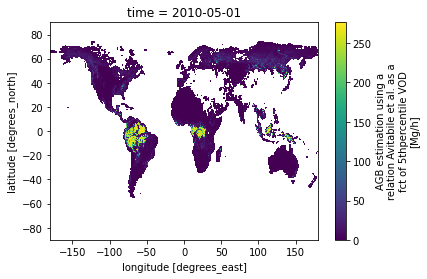

In [96]:
agb_data.sel(time=random_date).abg_avitabile_vod5th.plot()

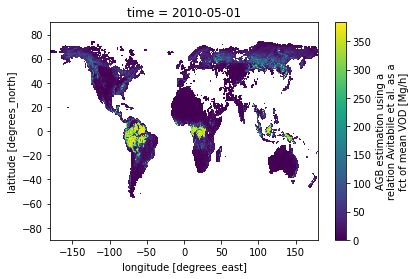

In [97]:
agb_data.sel(time=random_date).abg_avitabile_vodmean.plot()

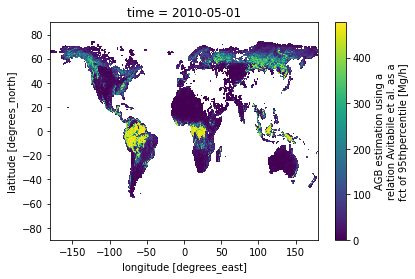

In [98]:
agb_data.sel(time=random_date).abg_avitabile_vod95th.plot()

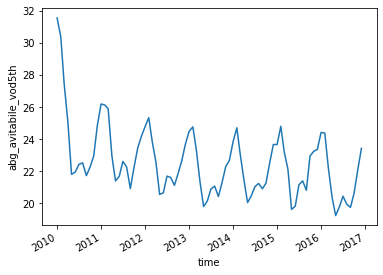

In [99]:
agb_data.abg_avitabile_vod5th.mean(dim=('longitude', 'latitude')).plot()

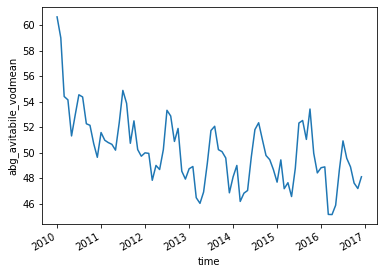

In [100]:
agb_data.abg_avitabile_vodmean.mean(dim=('longitude', 'latitude')).plot()

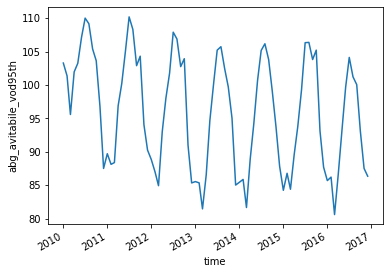

In [101]:
agb_data.abg_avitabile_vod95th.mean(dim=('longitude', 'latitude')).plot()

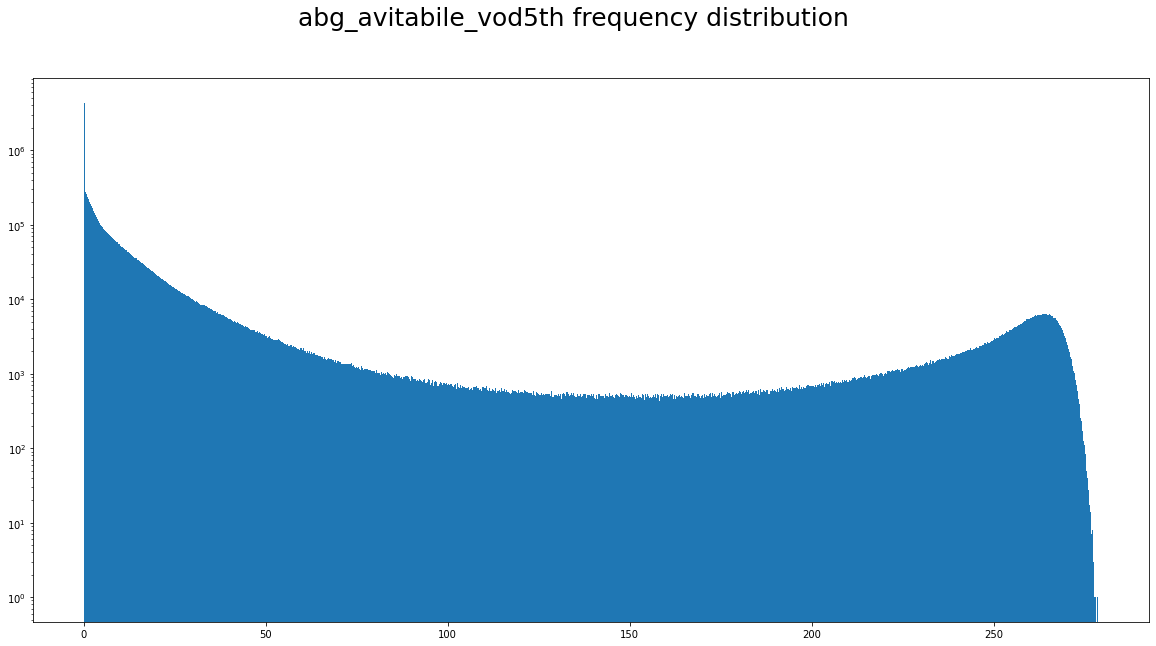

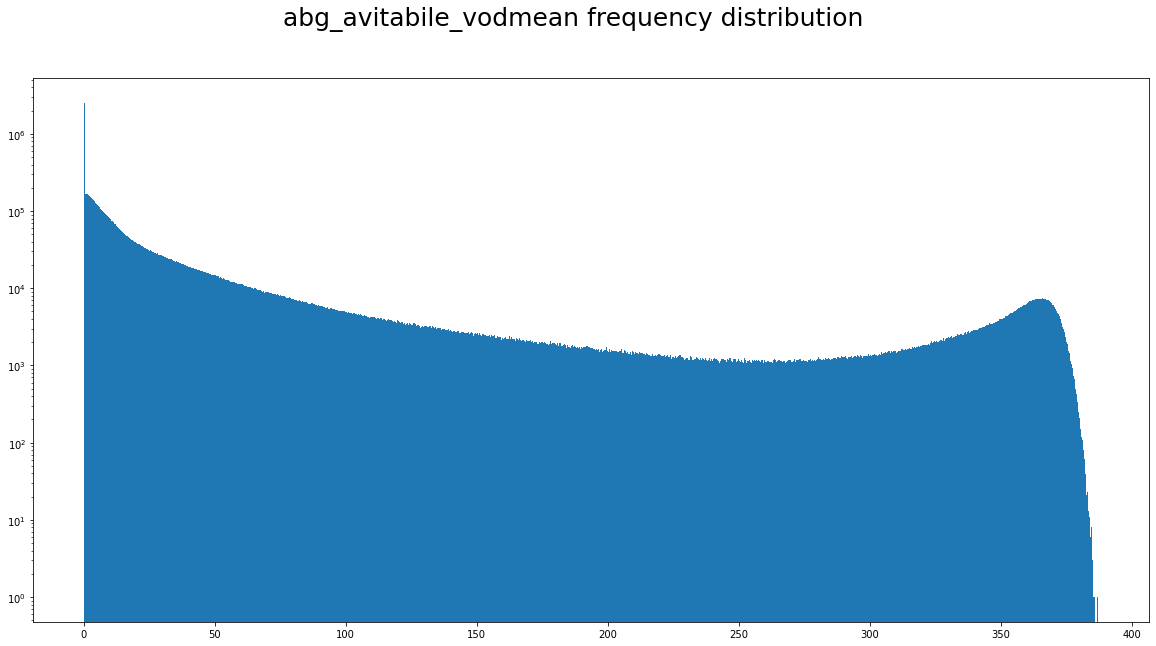

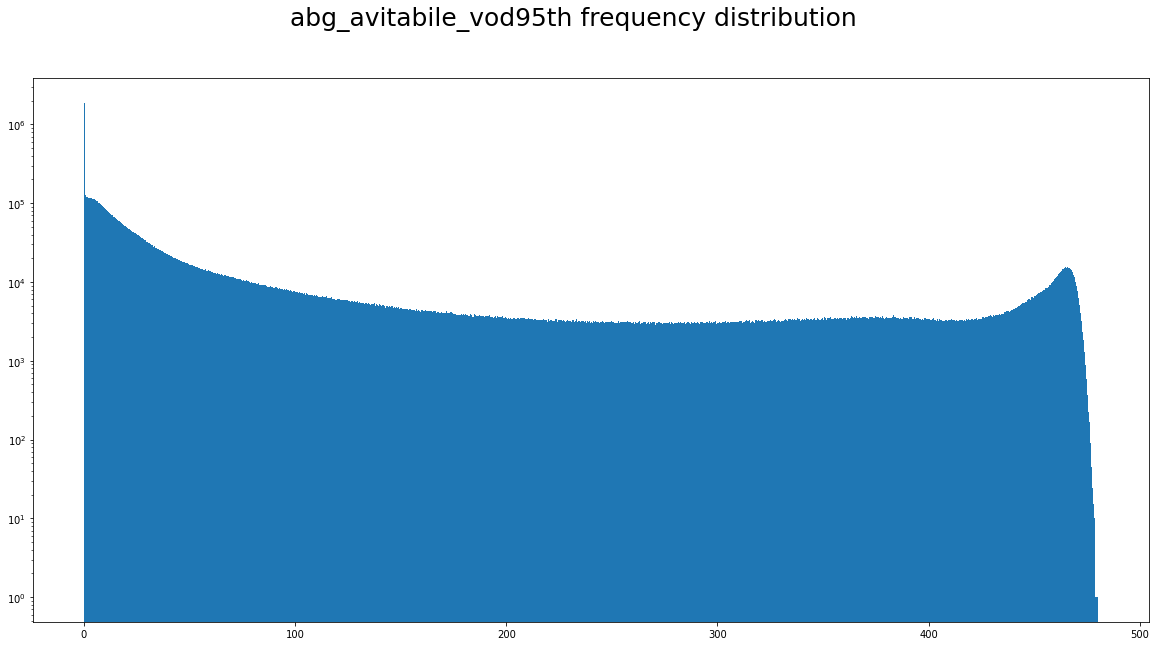

In [102]:
var_list =['abg_avitabile_vod5th', 'abg_avitabile_vodmean', 'abg_avitabile_vod95th']
for i in range(len(var_list)):
    plt.figure(figsize = (20,10)).suptitle(f'{var_list[i]} frequency distribution', fontsize=25)
    plt.hist(agb_data[list(agb_data.data_vars)[i]].values.flatten(), bins=1000, cumulative=False, log=True)

<a id='section8'></a>
#### Plotting weather anomalies data

In [103]:
"""Choosing a random date in 2010 for map projection plot"""
random_date = "201" + str(randint(0,6)) + "-" + str(randint(1, 12)) + "-01T00:00:00.000000000"

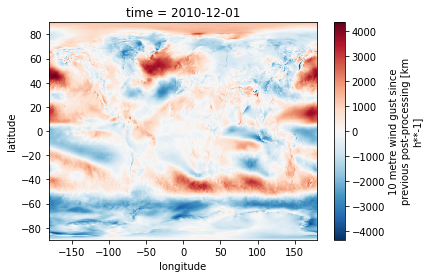

In [104]:
weather_anomalies_data.sel(time=random_date).fg10.plot()

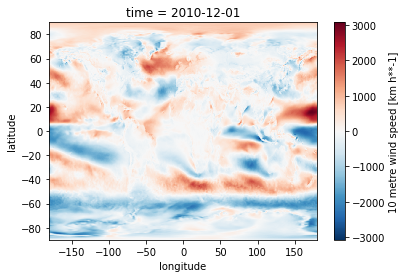

In [105]:
weather_anomalies_data.sel(time=random_date).si10.plot()

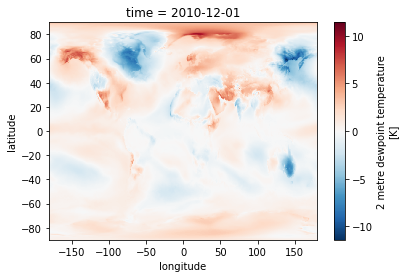

In [106]:
weather_anomalies_data.sel(time=random_date).d2m.plot()

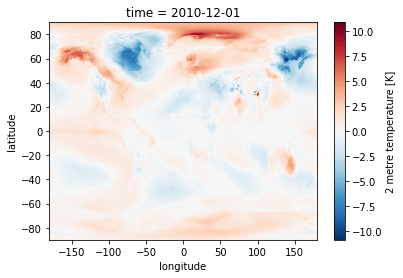

In [107]:
weather_anomalies_data.sel(time=random_date).t2m.plot()

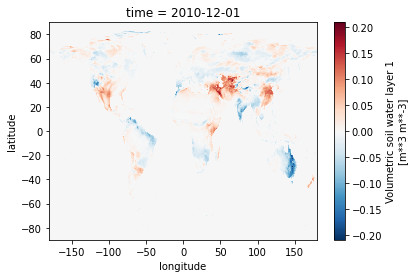

In [108]:
weather_anomalies_data.sel(time=random_date).swvl1.plot()

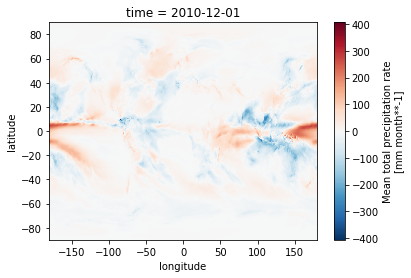

In [109]:
weather_anomalies_data.sel(time=random_date).tprate.plot()

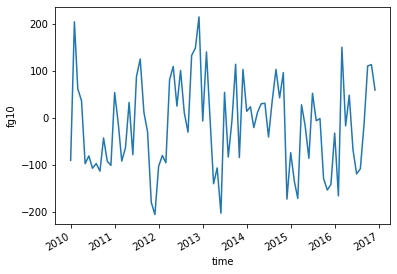

In [110]:
weather_anomalies_data.fg10.mean(dim=('longitude', 'latitude')).plot()

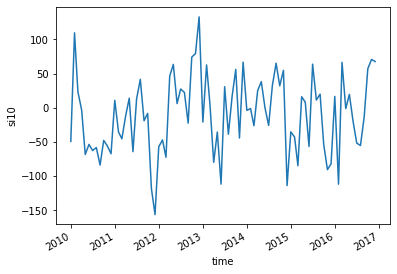

In [111]:
weather_anomalies_data.si10.mean(dim=('longitude', 'latitude')).plot()

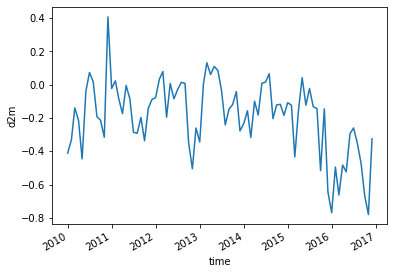

In [112]:
weather_anomalies_data.d2m.mean(dim=('longitude', 'latitude')).plot()

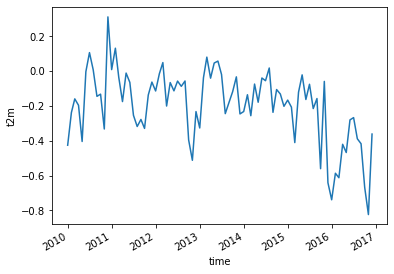

In [113]:
weather_anomalies_data.t2m.mean(dim=('longitude', 'latitude')).plot()

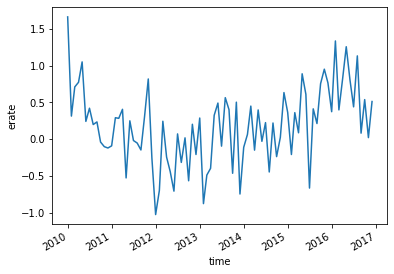

In [114]:
weather_anomalies_data.erate.mean(dim=('longitude', 'latitude')).plot()

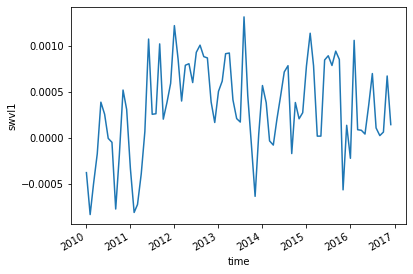

In [115]:
weather_anomalies_data.swvl1.mean(dim=('longitude', 'latitude')).plot()

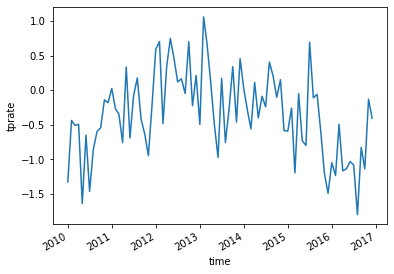

In [116]:
weather_anomalies_data.tprate.mean(dim=('longitude', 'latitude')).plot()

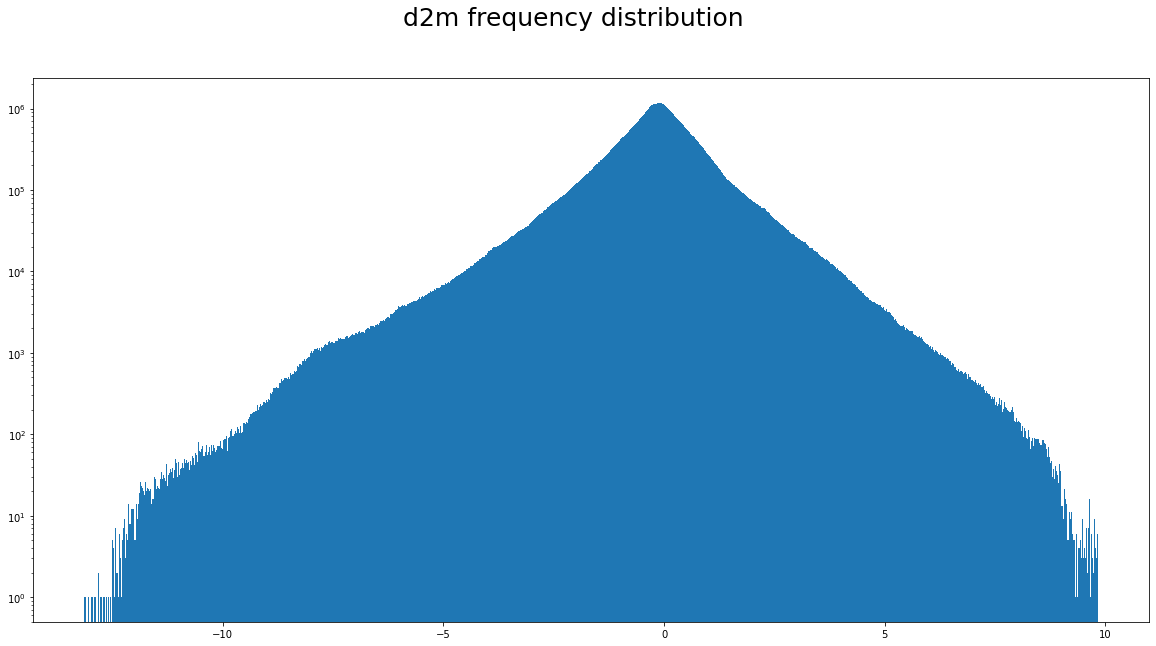

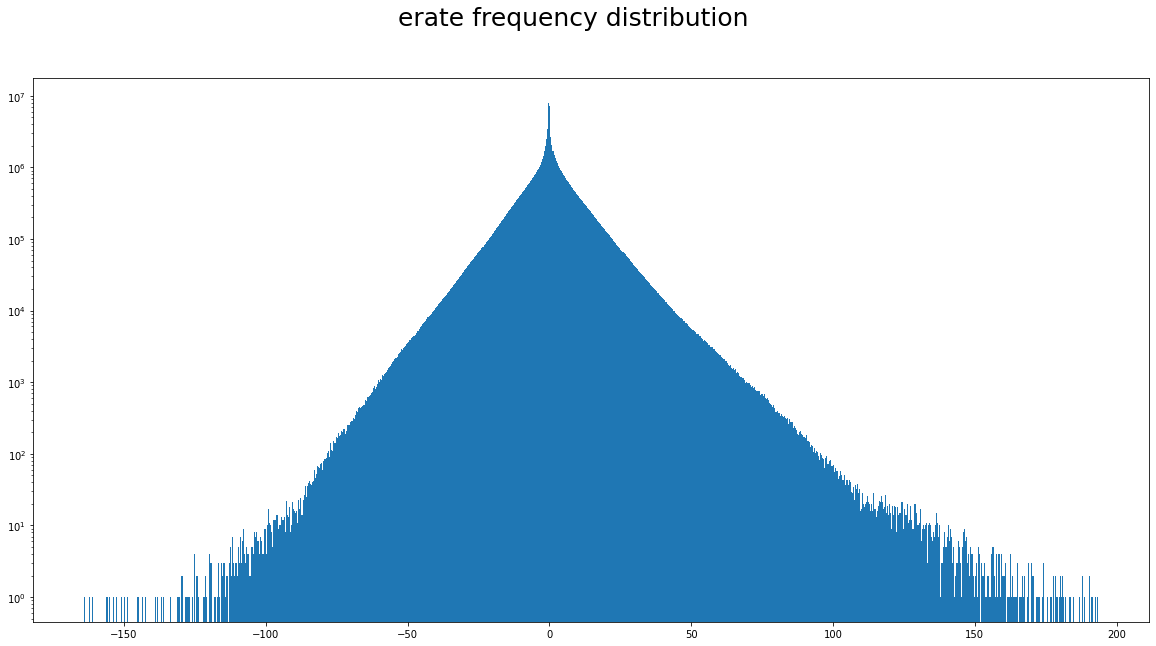

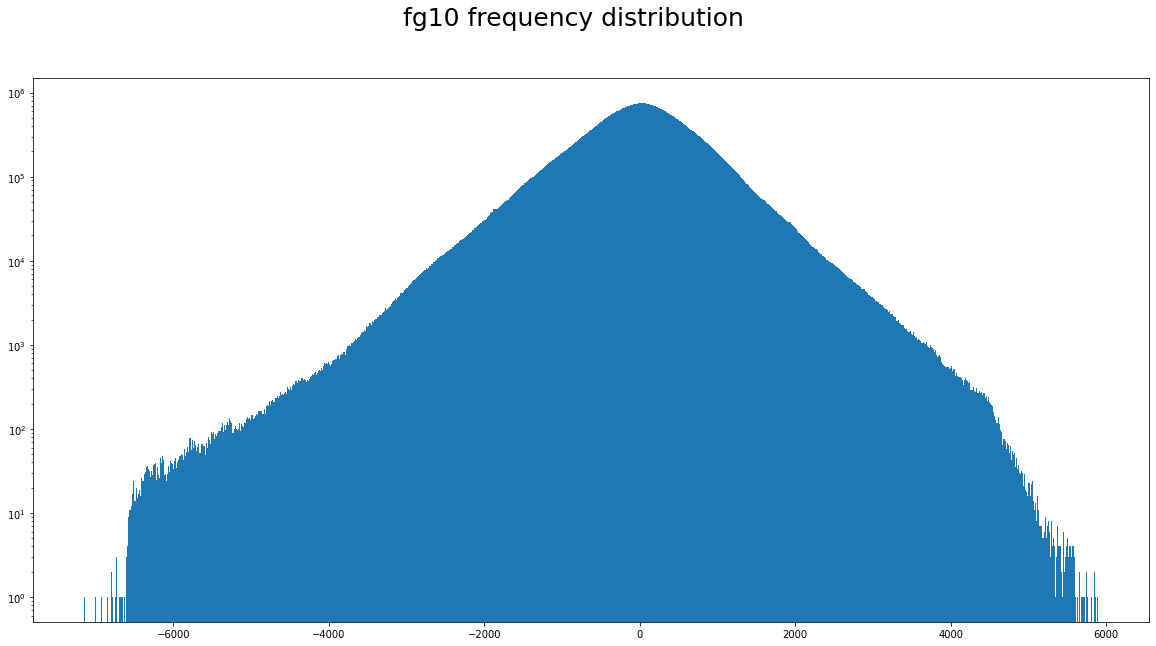

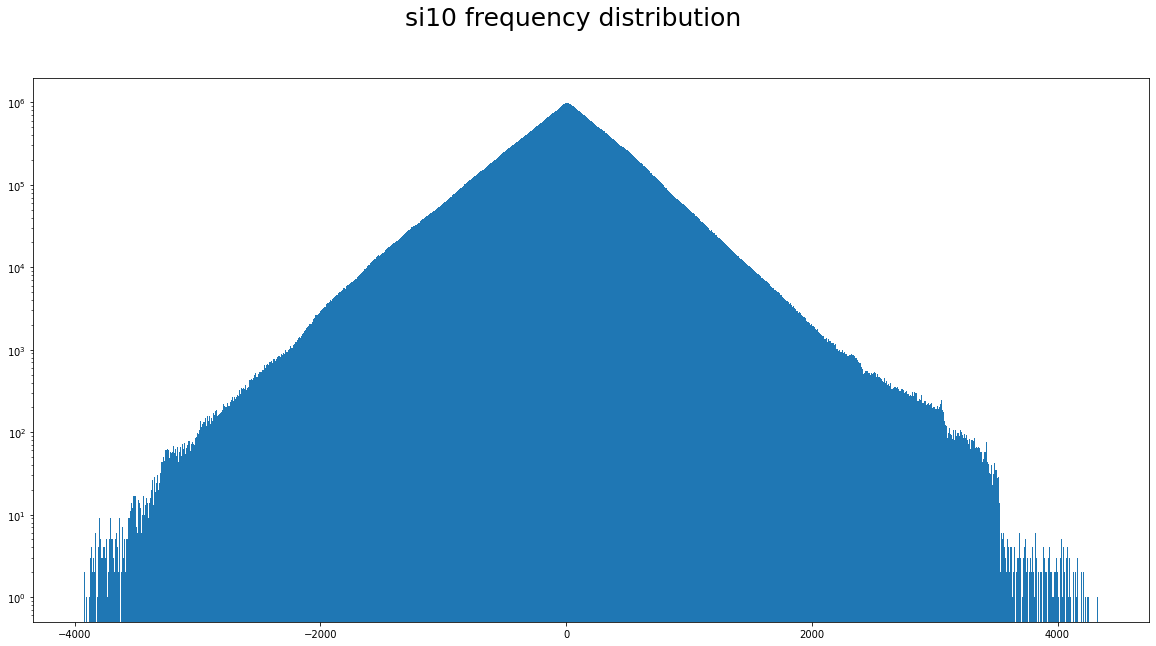

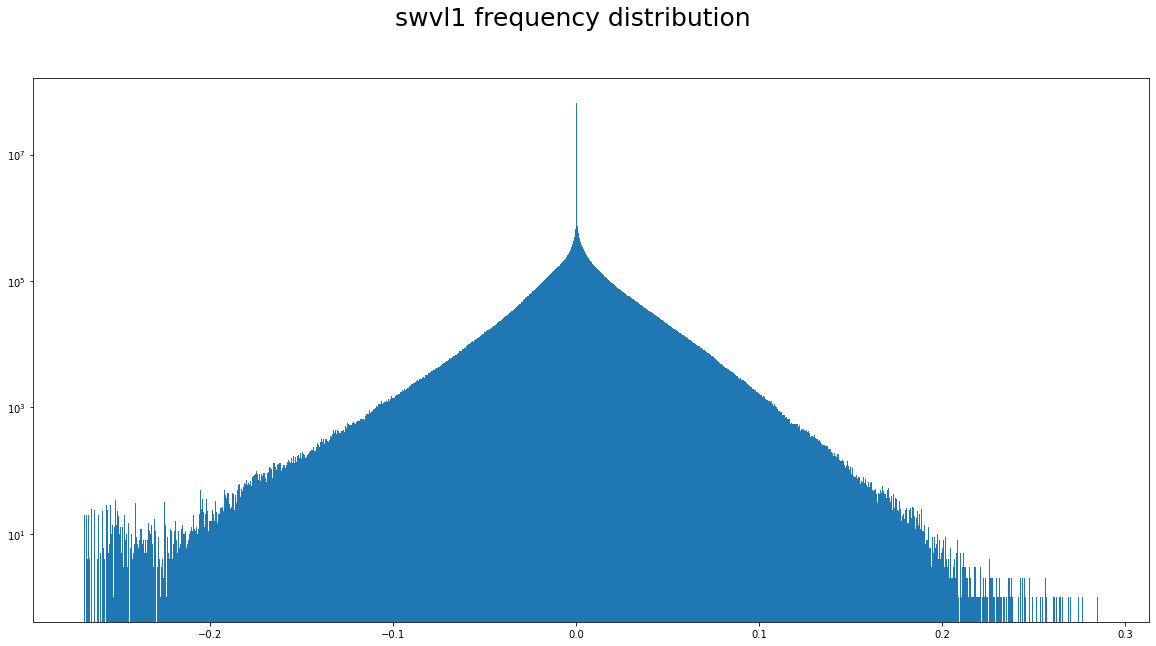

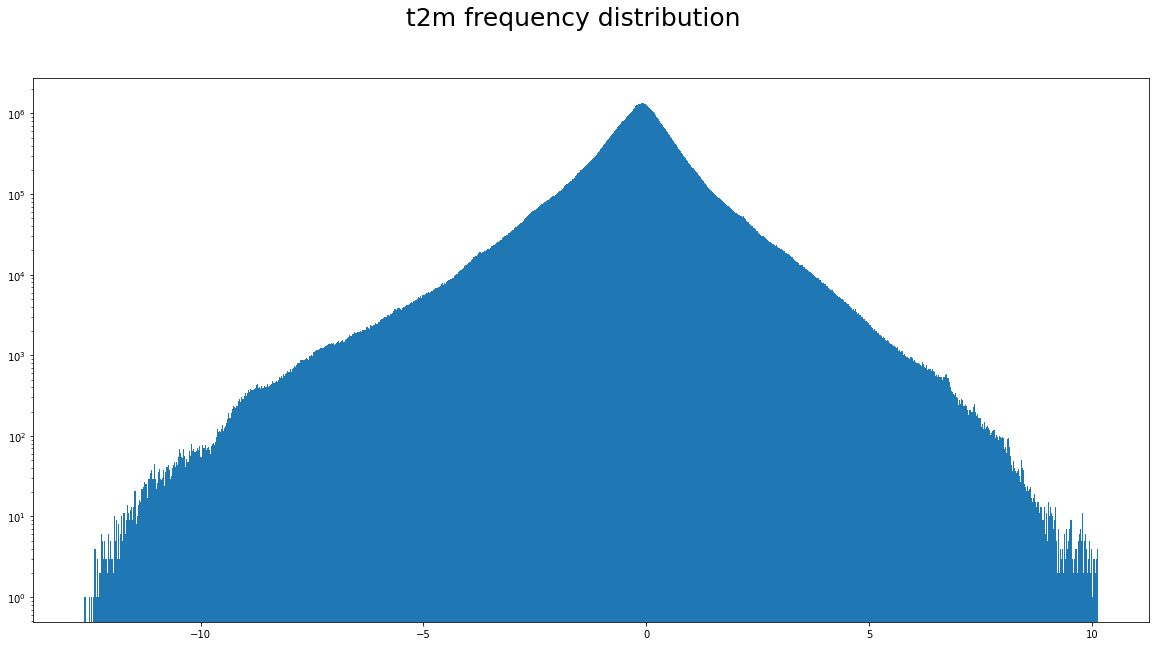

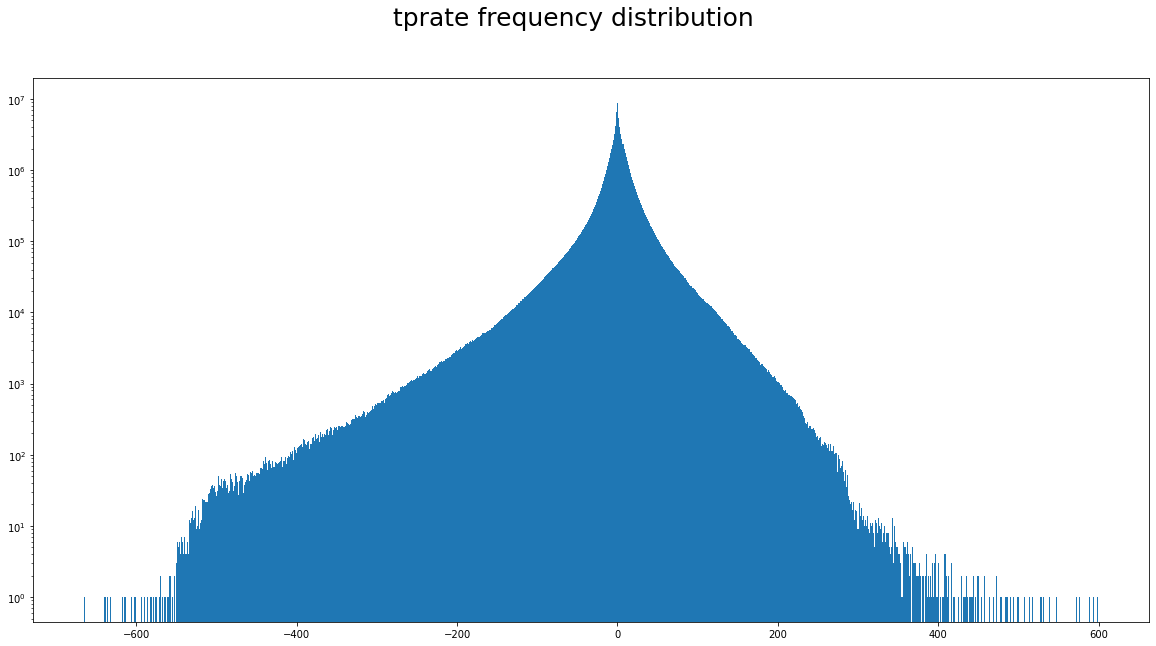

In [117]:
var_list =['d2m', 'erate', 'fg10', 'si10', 'swvl1', 't2m', 'tprate']
for i in range(len(var_list)):
    plt.figure(figsize = (20,10)).suptitle(f'{var_list[i]} frequency distribution', fontsize=25)
    plt.hist(weather_anomalies_data[list(weather_anomalies_data.data_vars)[i]].values.flatten(), bins=1000, cumulative=False, log=True)

<a id='section9'></a>
#### Plotting burned area data

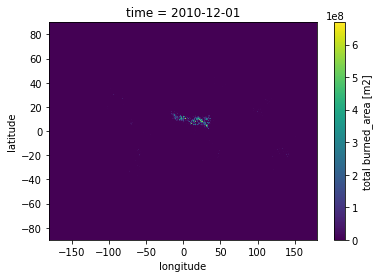

In [118]:
burned_area_data.sel(time=random_date).burned_area.plot()

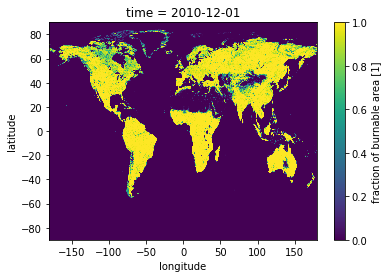

In [119]:
ba_fraction_data.sel(time=random_date).fraction_of_burnable_area.plot()

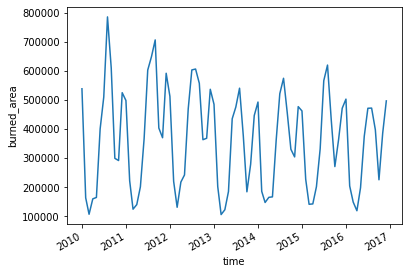

In [120]:
burned_area_data.burned_area.mean(dim=('longitude', 'latitude')).plot()

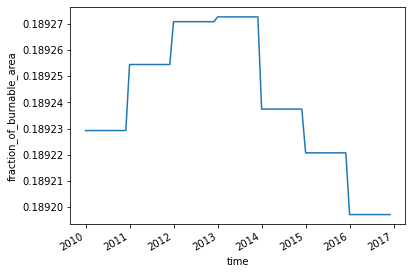

In [121]:
ba_fraction_data.fraction_of_burnable_area.mean(dim=('longitude', 'latitude')).plot()

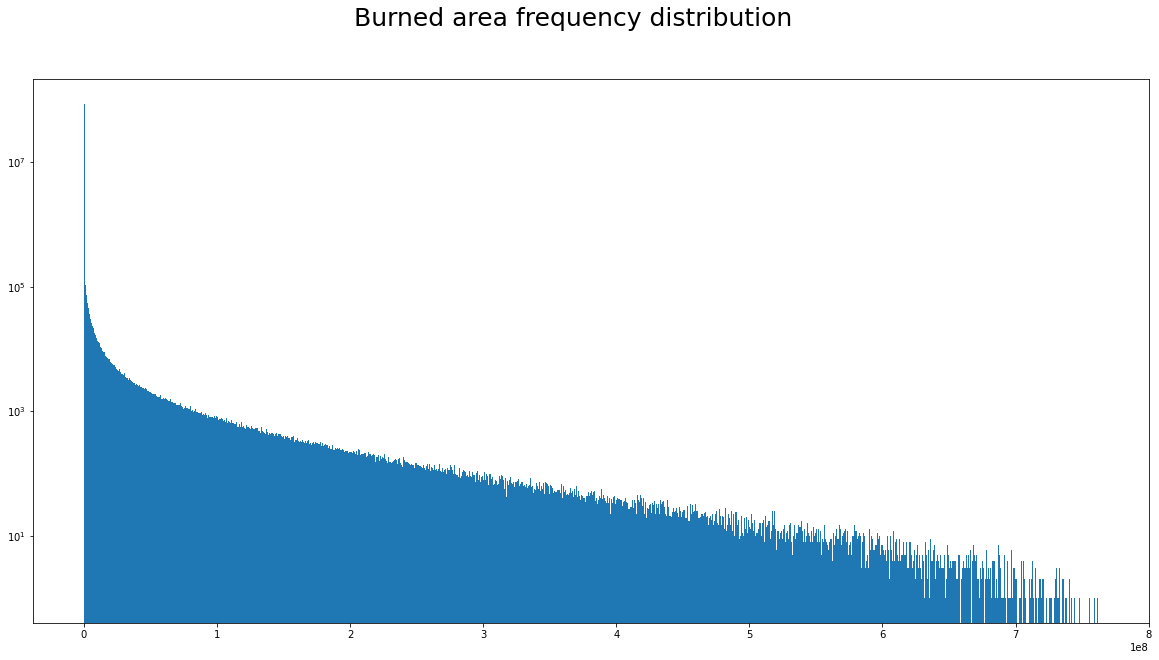

In [122]:
plt.figure(figsize = (20,10)).suptitle(f'{"Burned area"} frequency distribution', fontsize=25)
plt.hist(burned_area_data[list(burned_area_data.data_vars)[0]].values.flatten(), bins=1000, cumulative=False, log=True)
plt.show()

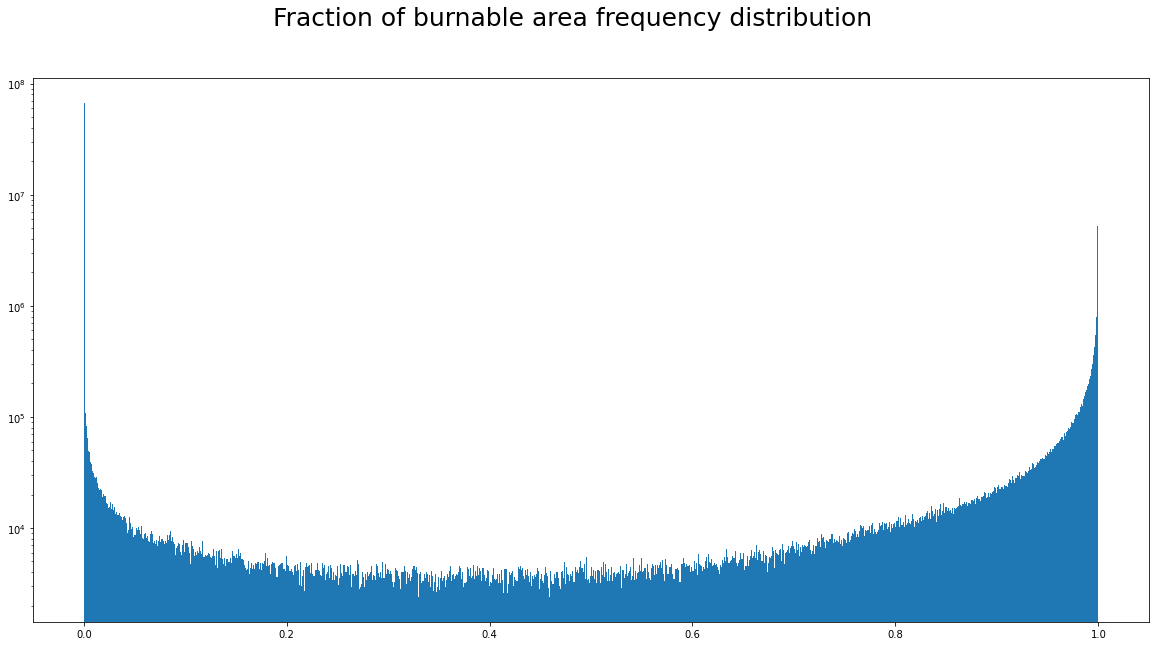

In [123]:
plt.figure(figsize = (20,10)).suptitle(f'{"Fraction of burnable area"} frequency distribution', fontsize=25)
plt.hist(ba_fraction_data[list(ba_fraction_data.data_vars)[0]].values.flatten(), bins=1000, cumulative=False, log=True)
plt.show()

<a id='section10'></a>
#### Plotting Slope data

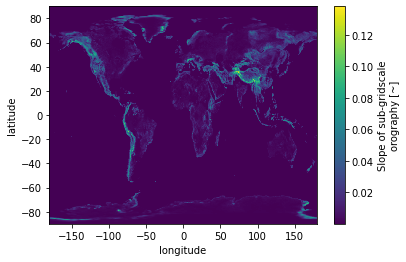

In [124]:
slopes_data.slor.plot()

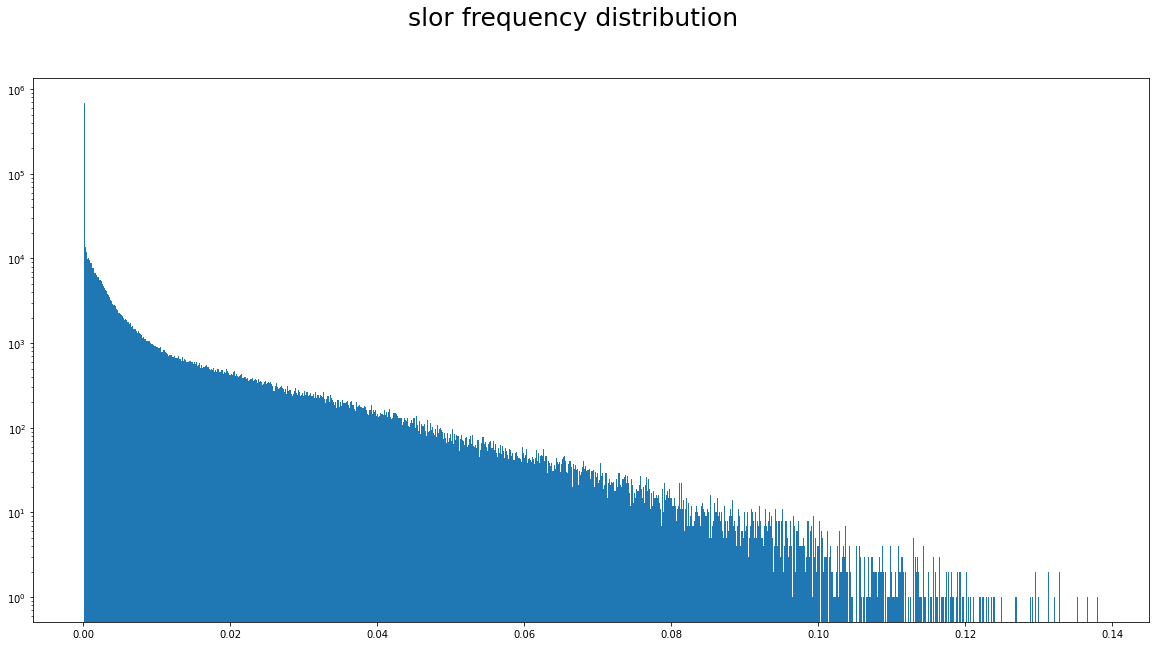

In [125]:
var_list =['slor']
for i in range(len(var_list)):
    plt.figure(figsize = (20,10)).suptitle(f'{var_list[i]} frequency distribution', fontsize=25)
    plt.hist(slopes_data[list(slopes_data.data_vars)[i]].values.flatten(), bins=1000, cumulative=False, log=True)

<a id='section13'></a>
#### Plotting Climatic Regions data

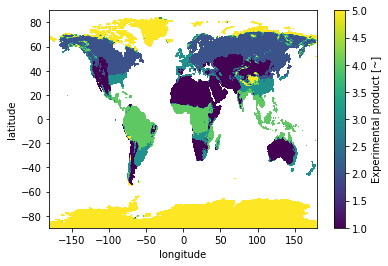

In [126]:
climatic_regions_data.climatic_region.plot()

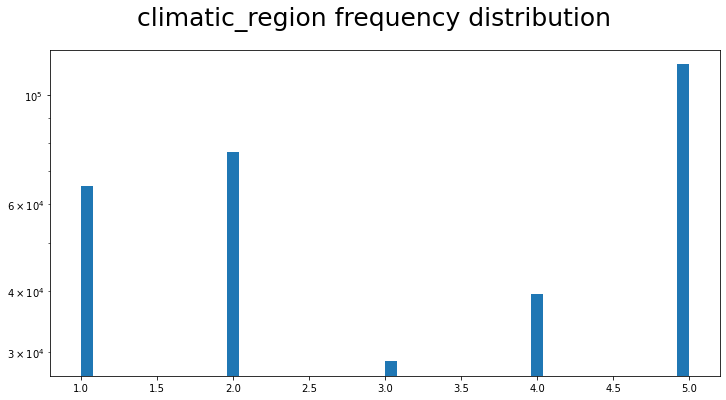

In [127]:
var_list =['climatic_region']
for i in range(len(var_list)):
    plt.figure(figsize = (12,6)).suptitle(f'{var_list[i]} frequency distribution', fontsize=25)
    plt.hist(climatic_regions_data[list(climatic_regions_data.data_vars)[i]].values.flatten(), bins=50, cumulative=False, log=True)

<a id='section15'></a>
#### Plotting Fire Anomalies data

In [128]:
"""Choosing a random date in 2010 for the heat map"""
random_date = "201" + str(randint(0,6)) + "-" + str(randint(1, 12)) + "-01T00:00:00.000000000"

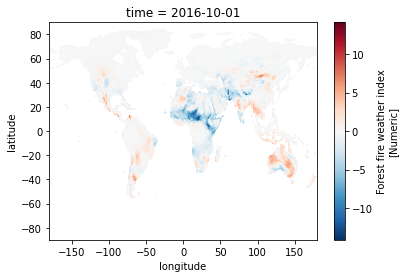

In [129]:
fire_anomalies_data.sel(time=random_date).fwinx.plot()

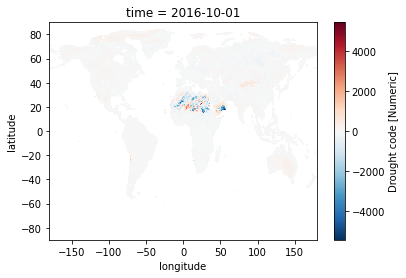

In [130]:
fire_anomalies_data.sel(time=random_date).drtcode.plot()

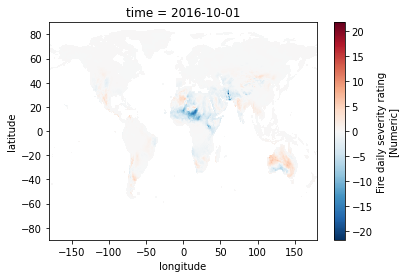

In [131]:
fire_anomalies_data.sel(time=random_date).fdsrte.plot()

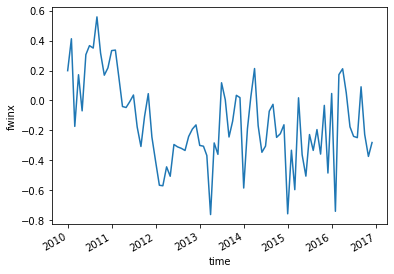

In [132]:
fire_anomalies_data.fwinx.mean(dim=('longitude', 'latitude')).plot()

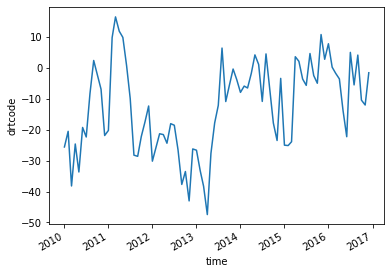

In [133]:
fire_anomalies_data.drtcode.mean(dim=('longitude', 'latitude')).plot()

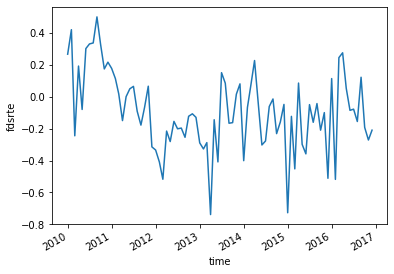

In [134]:
fire_anomalies_data.fdsrte.mean(dim=('longitude', 'latitude')).plot()

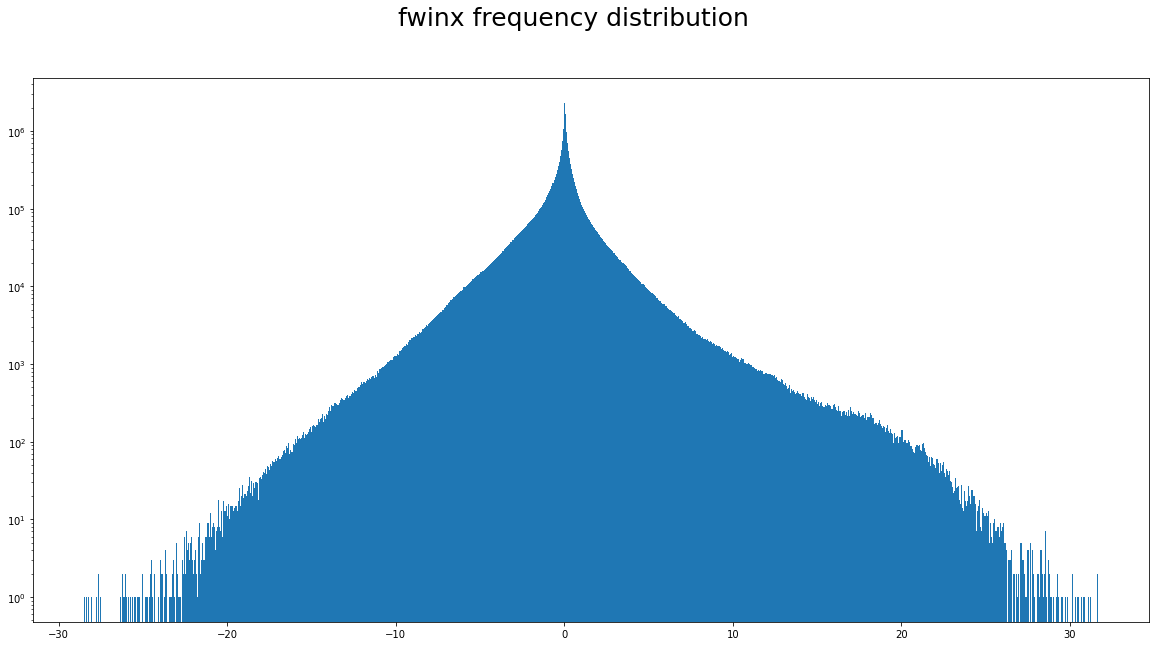

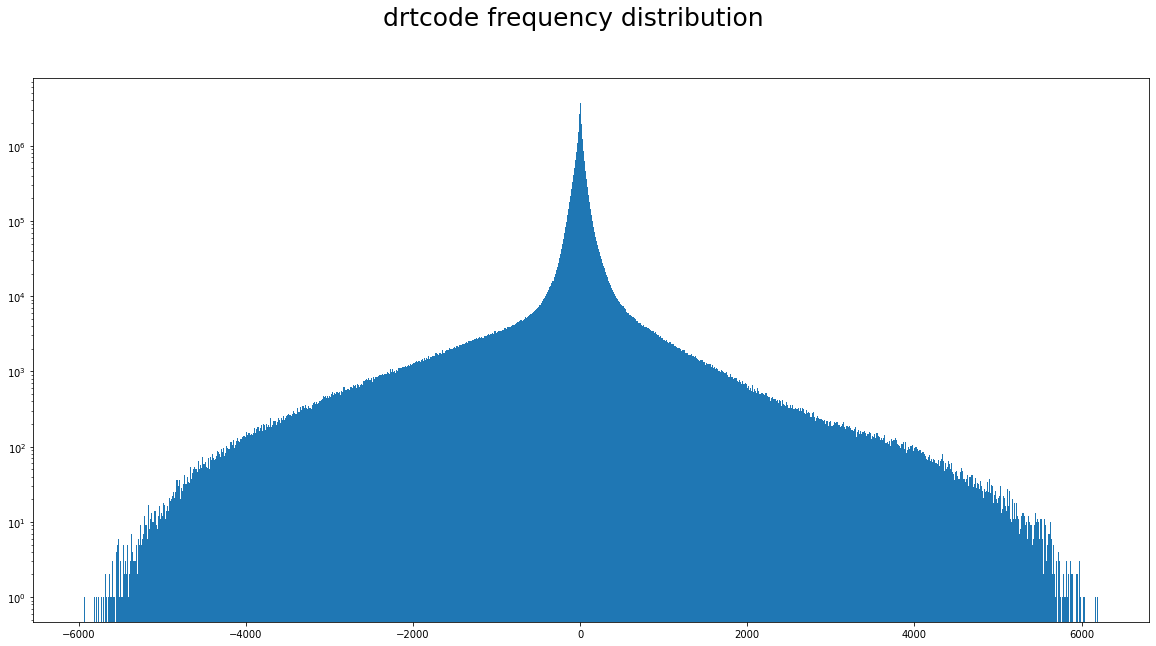

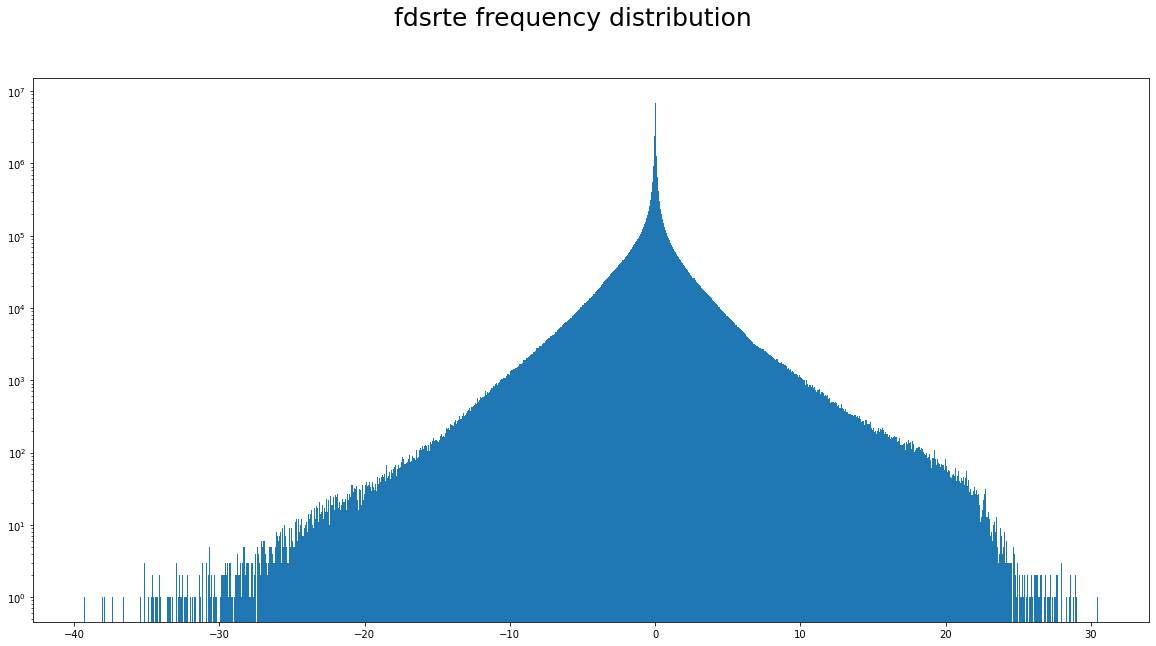

In [135]:
var_list =['fwinx', 'drtcode', 'fdsrte']
for i in range(len(var_list)):
    plt.figure(figsize = (20,10)).suptitle(f'{var_list[i]} frequency distribution', fontsize=25)
    plt.hist(fire_anomalies_data[['fwinx', 'drtcode', 'fdsrte'][i]].values.flatten(), bins=1000, cumulative=False, log=True)

<a id='section16'></a>
#### Plotting SPI-GPCC data

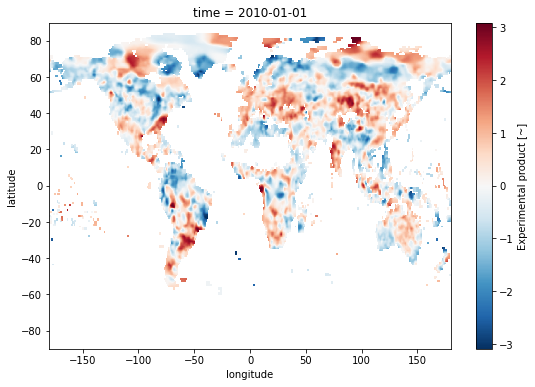

In [136]:
spi_gpcc_data.sel(time='2010-01-01T00:00:00.000000000').spi03.plot(size=6)

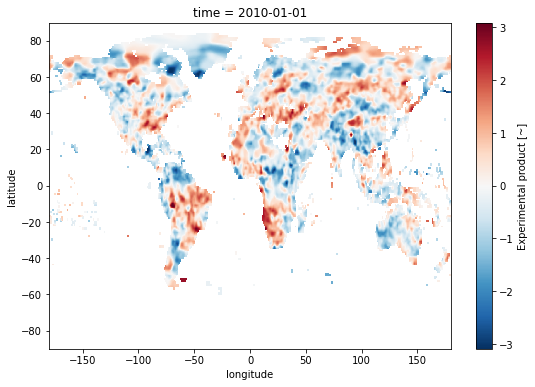

In [137]:
spi_gpcc_data.sel(time='2010-01-01T00:00:00.000000000').spi12.plot(size=6)

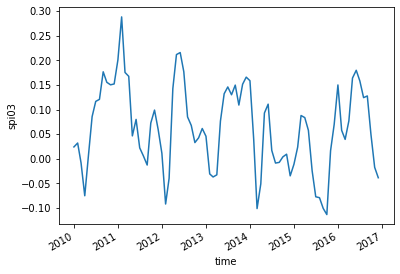

In [138]:
spi_gpcc_data.spi03.mean(dim=('longitude', 'latitude')).plot()

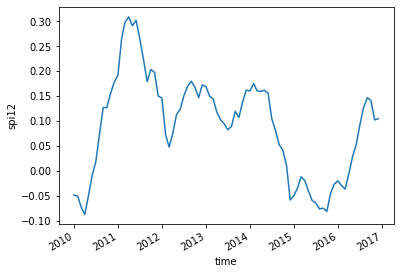

In [139]:
spi_gpcc_data.spi12.mean(dim=('longitude', 'latitude')).plot()

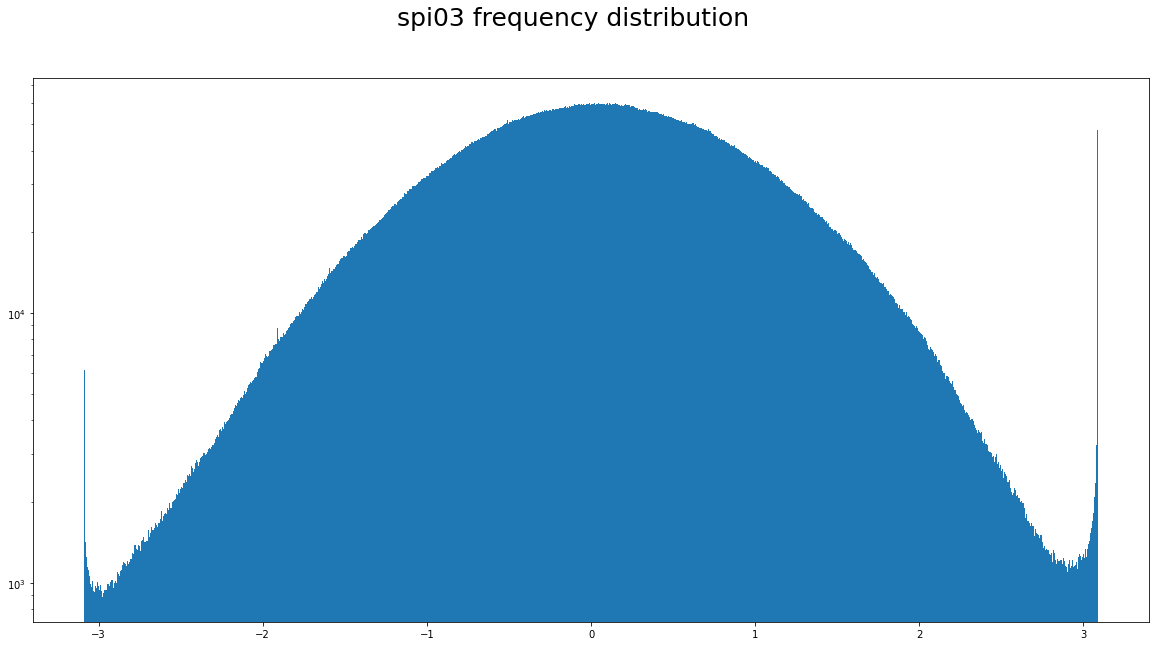

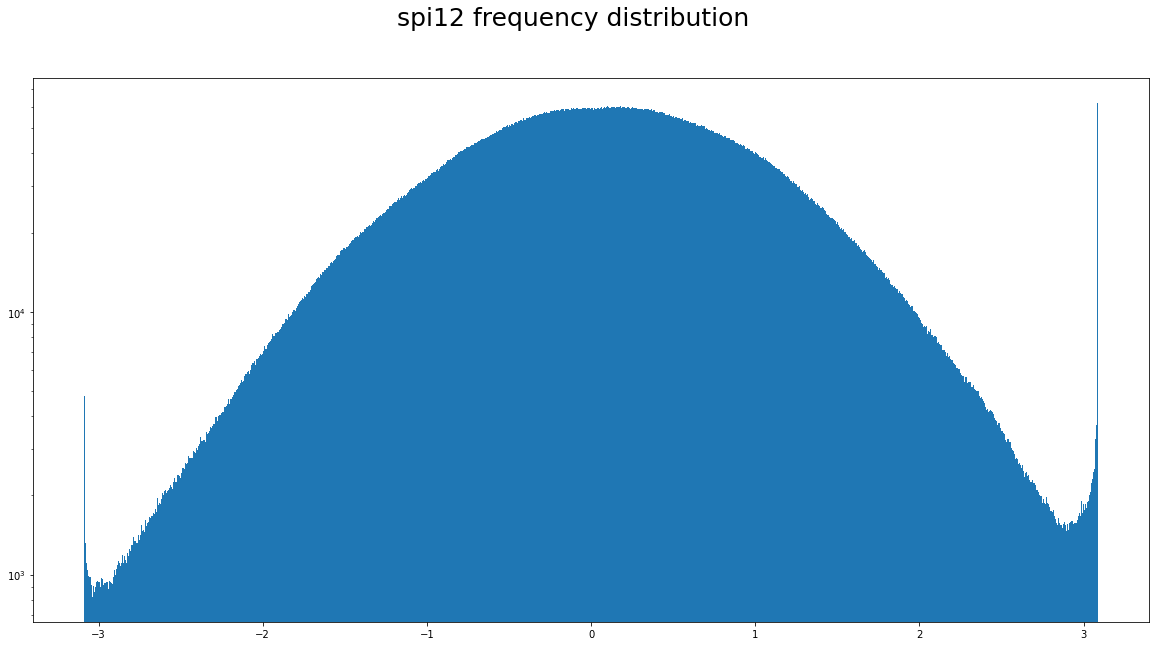

In [140]:
var_list =['spi03', 'spi12']
for i in range(len(var_list)):
    plt.figure(figsize = (20,10)).suptitle(f'{var_list[i]} frequency distribution', fontsize=25)
    plt.hist(spi_gpcc_data[var_list[i]].values.flatten(), bins=1000, cumulative=False, log=True)

<a id='section17'></a>
#### Plotting Leaf Area Index data

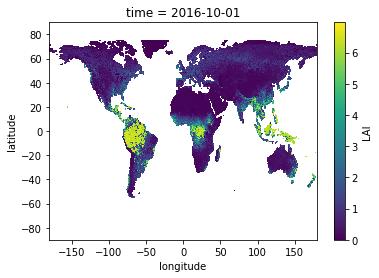

In [141]:
leaf_area_data.sel(time=random_date).LAI.plot()

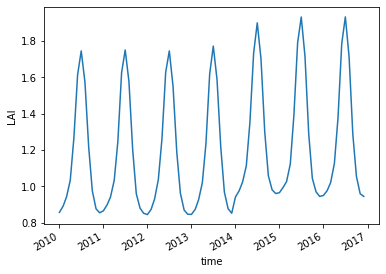

In [142]:
leaf_area_data.LAI.mean(dim=('longitude', 'latitude')).plot()

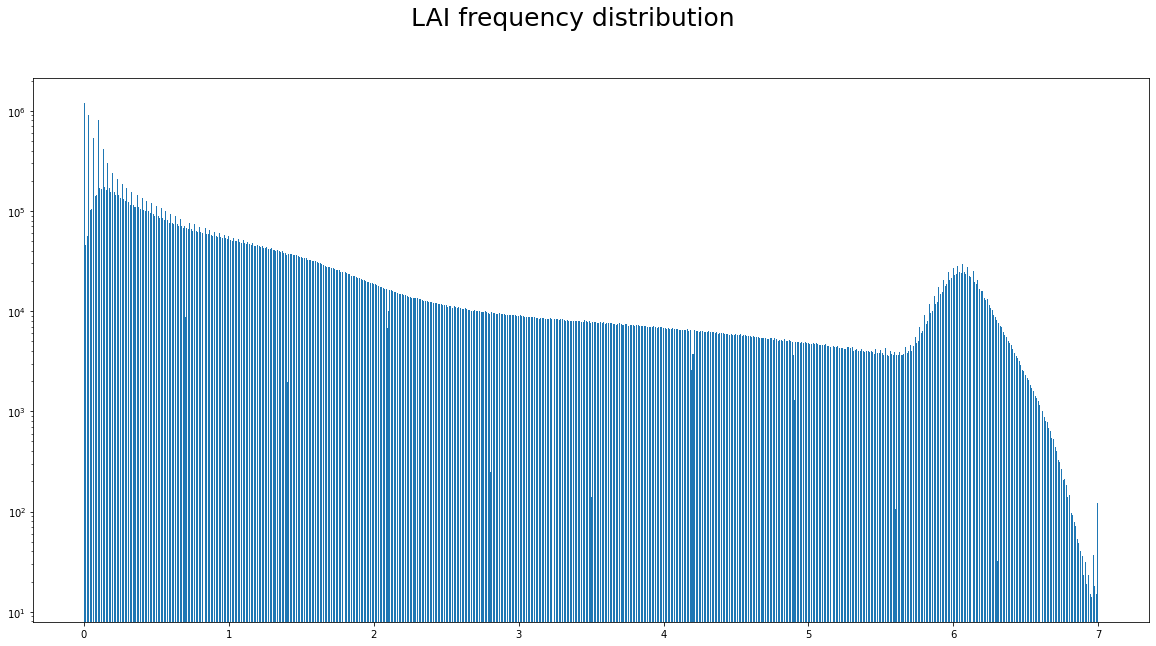

In [143]:
plt.figure(figsize = (20,10)).suptitle(f'LAI frequency distribution', fontsize=25)
plt.hist(leaf_area_data[list(leaf_area_data.data_vars)[0]].values.flatten(), bins=1000, cumulative=False, log=True)
plt.show()

<a id='section18'></a>
### Plotting Fuel load data

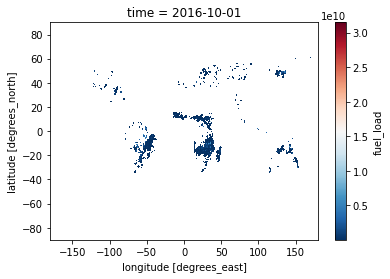

In [144]:
fuel_load_data.sel(time=random_date).fuel_load.plot.pcolormesh(cmap='RdBu_r')

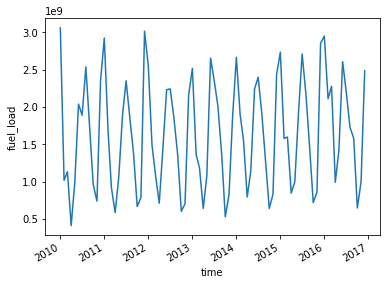

In [145]:
fuel_load_data.fuel_load.mean(dim=('longitude', 'latitude')).plot()

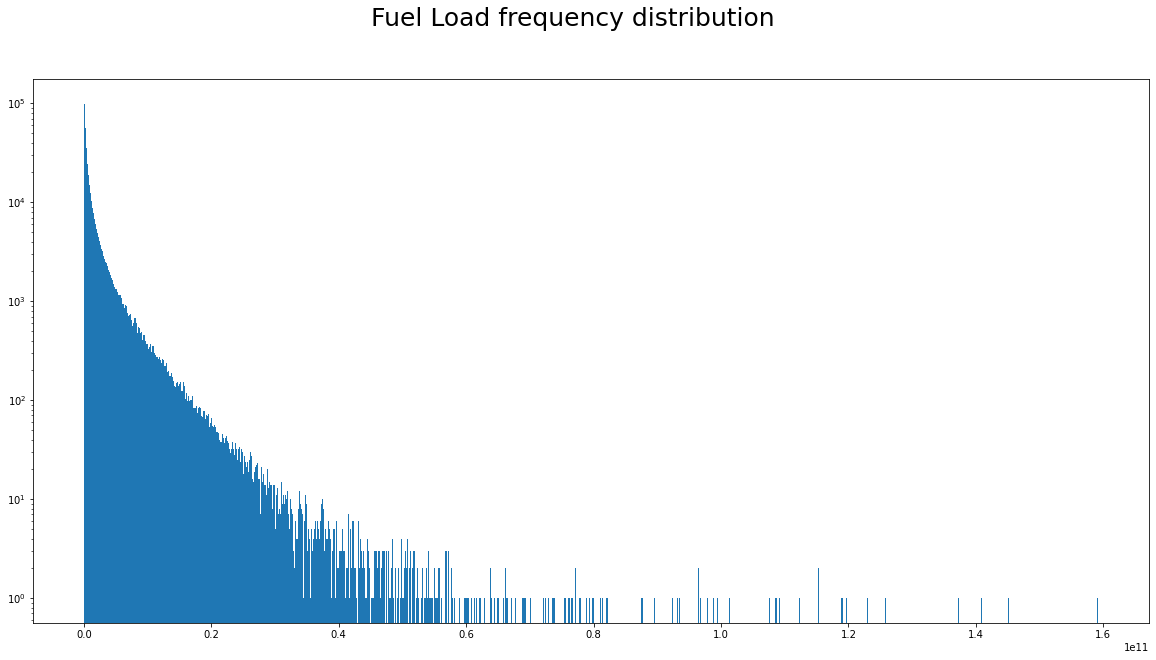

In [146]:
plt.figure(figsize = (20,10)).suptitle(f'{"Fuel Load"} frequency distribution', fontsize=25)
plt.hist(fuel_load_data[list(fuel_load_data.data_vars)[0]].values.flatten(), bins=1000, cumulative=False, log=True)
plt.show()

### Skew scores

In [147]:
#Before transformation
print(skew(fuel_load_data.fuel_load.values.flatten(),nan_policy='omit'))

7.0555954345420675


In [148]:
scaler = PowerTransformer(method="box-cox")
fuel_load_transform = scaler.fit_transform(fuel_load_data.fuel_load.values.flatten().reshape(-1,1))

In [149]:
#After transformation
print(skew(fuel_load_transform.flatten(),nan_policy='omit'))

-0.0021534648839915327


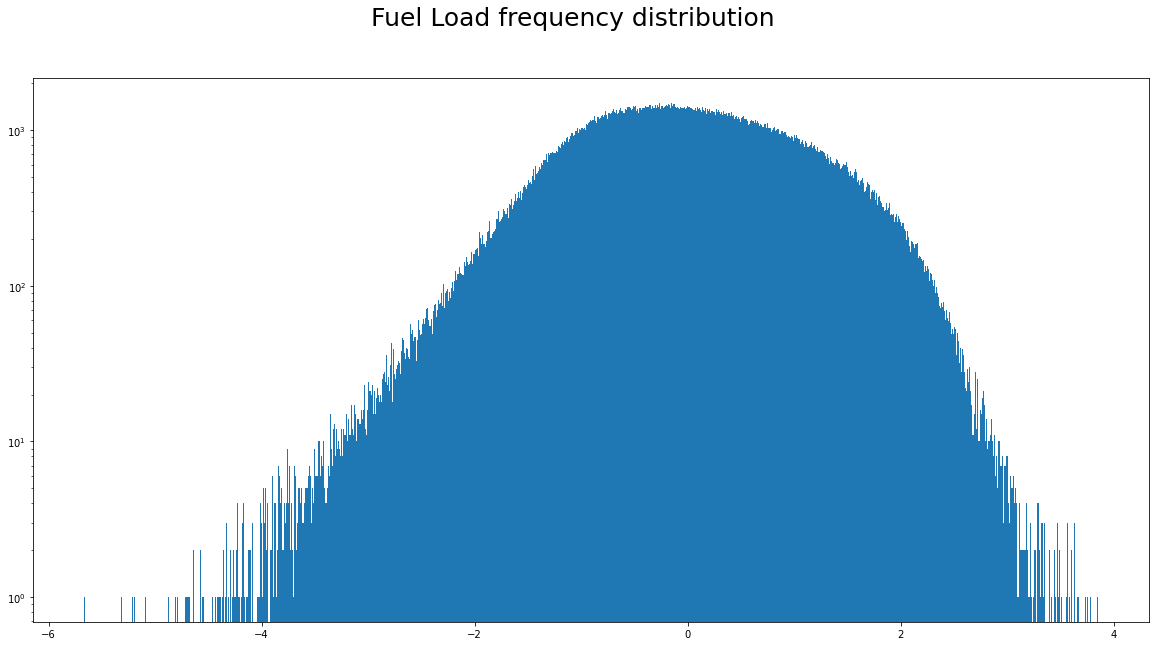

In [150]:
#Plot after box-cox
plt.figure(figsize = (20,10)).suptitle(f'{"Fuel Load"} frequency distribution', fontsize=25)
plt.hist(fuel_load_transform.flatten(), bins=1000, cumulative=False, log=True)
plt.show()